# Project work: Analysis of the "Adult dataset" (Part One)

**Aim:**

1) Data pre-processing to find the best way to use the given dataset.

2) Logistic Regression and parameters optimization.

3) Decision trees and Random Forests

### Dataset Description

**Target Information:**

Binary variable (>50K, <=50K) which shows two cathegories of annual income.

**Feature Information (taken from the official documentation):**

1) age: continuous.

2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3) fnlwgt: continuous.

4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5) education-num: continuous.

6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10) sex: Female, Male.

11) capital-gain: continuous.

12) capital-loss: continuous.

13) hours-per-week: continuous.

14) native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Libraries:

Importation of useful libreries for all the data analysis's steps

In [1]:
#Ordinary Libraries for Data Manipulation:
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

#Libraries for plotting:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Warnings:
from warnings import filterwarnings
filterwarnings("ignore")

### Preprocessing and Exploratory Data Analysis

**Aim:**

The aim is to manage the data to make the Dataframe ready for the estimation of proper models

In [2]:
#Url where to find the Dataframe:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [3]:
#Columns's names

names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
         "hours-per-week", "native-country", "target"]

In [4]:
#Import the Dataframe:

df = pd.read_csv(url, sep = ", ", engine = "python", na_values = "?", names = names)

In [5]:
#Show the Dataframe:

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Analysis of 'na values':**

**Results:**

1) "workclass" and "occupation": These na values had been imputed with an additional mode "unemployed"

2) "native-country": This columns had been dropped

In [6]:
#Display of the na-values:

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [7]:
#Check of the 'na values' corrispondencies between 'occupation' and 'workclass':

index = 0
total = 0
null_o = df["occupation"].isnull().sum()
null_w = df["workclass"].isnull().sum()
for nan_o, nan_w in zip(df["occupation"].isnull(), df["workclass"].isnull()):
    if (nan_o == True and nan_w == True):
        total += 1
    index += 1
print(f"Cases in which there's a corrispondance between the nan: {total}\nPercentage of corrispondance (occupation): {(total/null_o)*100}\nPercentage of corrispondance (workclass): {(total/null_w)*100}")

Casistiche in cui coincidono gli nan: 1836
Percentuale rispetto ad occupation: 99.62018448182312
Percentuale rispetto a workclass: 100.0


In [8]:
#Imputation of the 'na values' with the additional modality 'unemployed':

df["workclass"].fillna(value = "unemployed", inplace = True)
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [9]:
#Removal of the cases in which there isn't a correspondence between 'occupation' and 'workclass''s 'na values':

df.drop(index = [5361, 10845, 14772, 20337, 23232, 32304, 32314], inplace = True)

In [10]:
#Imputation of the 'na values' with the additional modality 'unemployed':

df["occupation"].fillna(value = "unemployed", inplace = True)
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    583
target              0
dtype: int64

In [11]:
#Analysis of the column 'native-country':

df["native-country"].value_counts()

United-States                 29163
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [12]:
#Removal of 'native-country' columns due to its 'na-values' and its strong polarization:

df.drop(columns = "native-country", inplace = True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
target            0
dtype: int64

**Analysis of Numerical Variabiles:**

**Results:**

None of the numerical variables seems to be correlated to the others

1) "fnlwgt": This variable had been removed considering its poor information and its high floating attitude

2) "capital-gain" and "capital-loss": These numerical predictors had been aggregated in an unique variable to reduce the dimensionality of the Dataframe and to obtain the total capital variation for each of the observations

<Figure size 576x432 with 0 Axes>

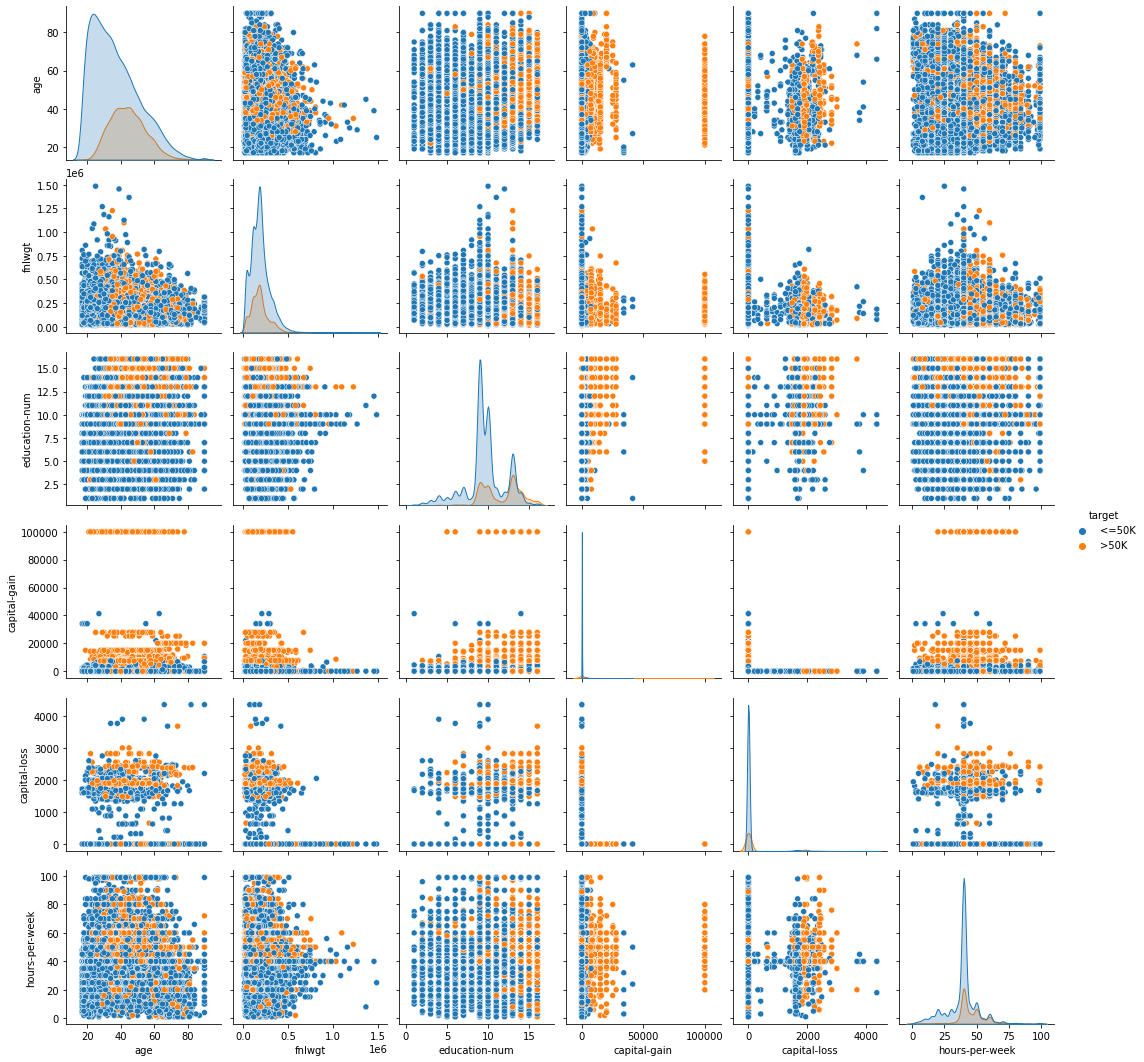

In [13]:
#Pairplot to show if there's correlation between predictors:

fig = plt.figure(figsize = (8, 6))
sns.pairplot(data = df, hue = "target")
plt.show()

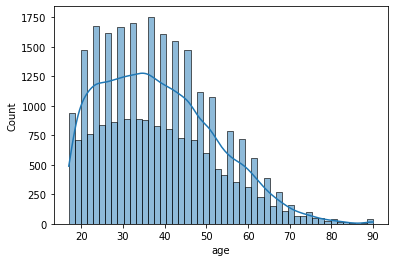

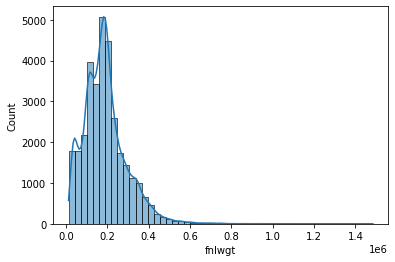

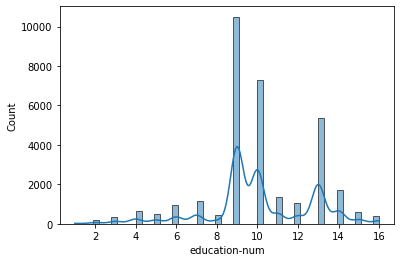

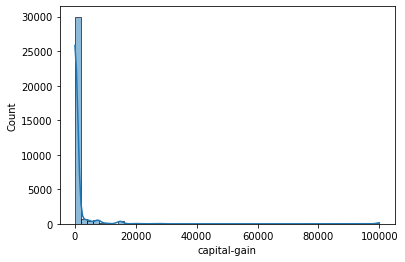

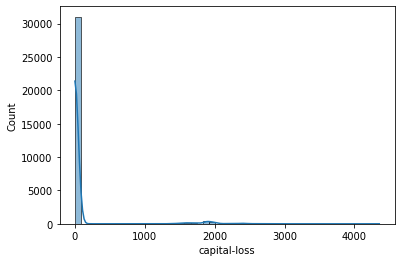

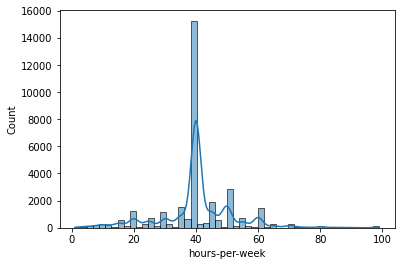

In [14]:
#Histplot of numerical variables to show their distribution:

numerics = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for numeric in numerics:
    sns.histplot(data = df, x = numeric, kde = True, bins = 50)
    plt.show()

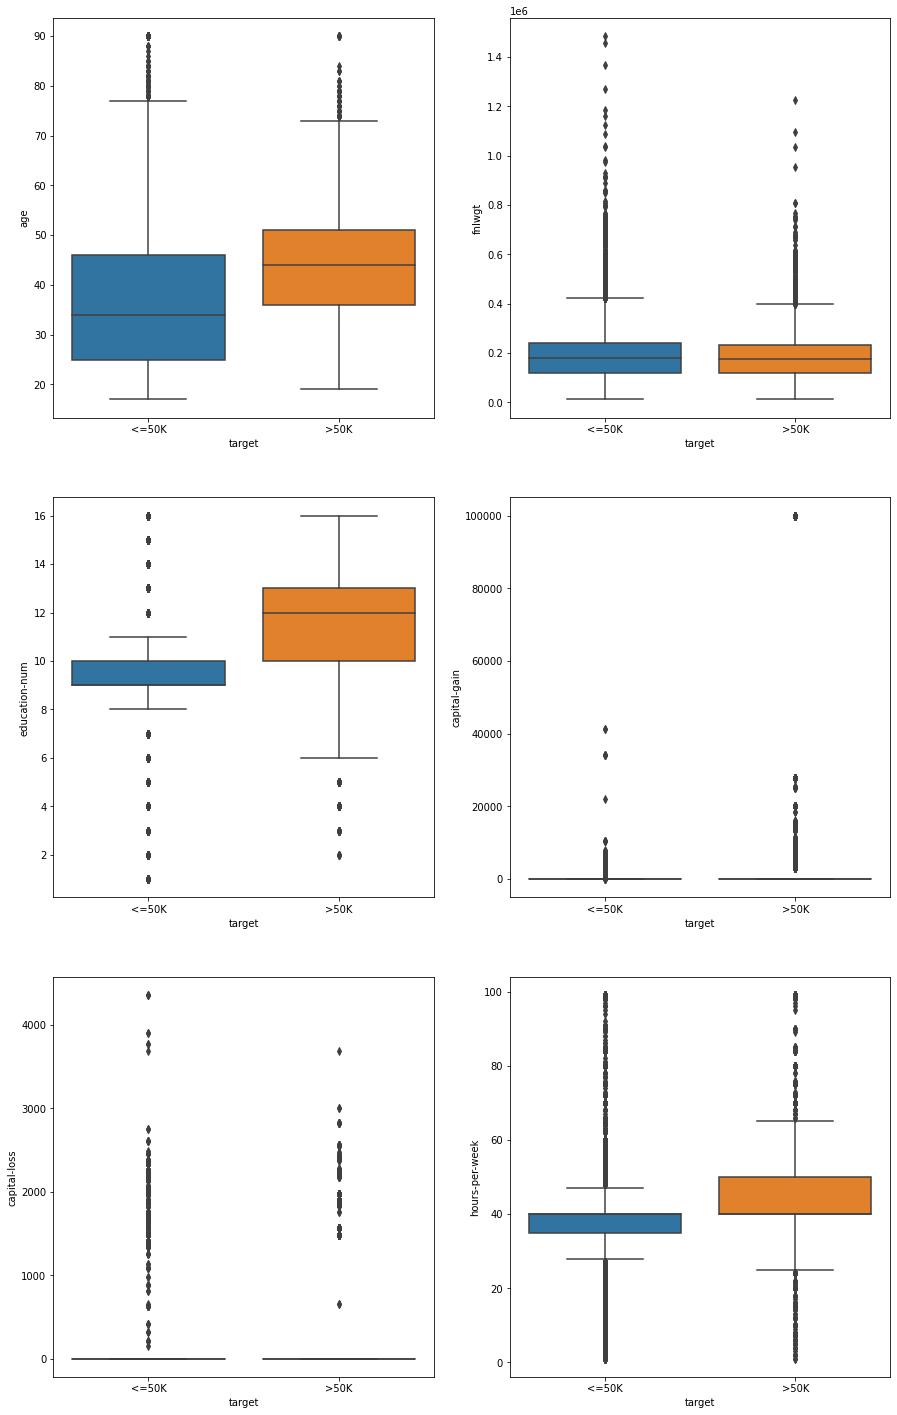

In [15]:
#Boxplots to see the relationship between the target and the possible numerical predictors:

fig = plt.figure(figsize = (15, 25))
axes = fig.subplots(nrows = 3, ncols = 2)
for numeric, ax in zip(numerics, axes.flatten()):
    sns.boxplot(data = df, y = numeric, x = "target", ax = ax)

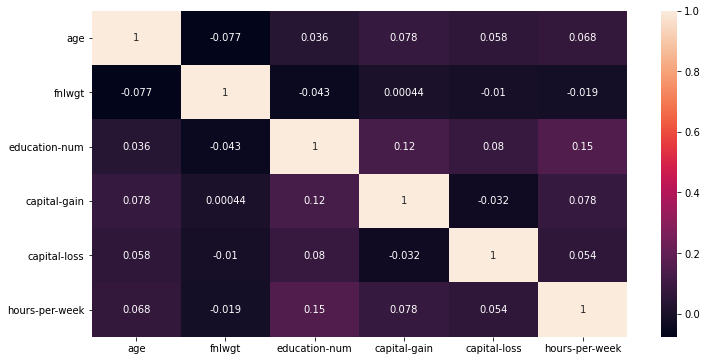

In [16]:
#Heatmap to show the correlation between the numerical variables of the Dataset:

fig = plt.figure(figsize = (12, 6))
sns.heatmap(data = df[numerics].corr(), annot = True)
plt.show()

In [17]:
#Aggregation of the columns 'capital-gain' and 'capital-loss':
"""
The two variables contain a similar information which can be useful to agreggate in one column both to reduce the 
dimensionality of the dataset and to have more significant data
"""

df["capital"] = df["capital-gain"] - df["capital-loss"]
df.drop(columns = ["capital-gain", "capital-loss"], inplace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,target,capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K,0


In [18]:
#Drop of the variable 'fnlwgt' which contains a non significant information and that is too much floating:

df.drop(columns = "fnlwgt", inplace = True)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,target,capital
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,2174
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K,0
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K,0


**Analysis of categorical variables:**

**Results:**

Some of the categorical variables had been aggregated to reduce the number of their modalities in order to obtain a lower number of coefficients and to delete useless information

1) "education": This column had been dropped because the numerical variable "education-num" contain a similar information but is more specific


2) "relationship": This columns had been dropped because a similar information is contained in the variable "marital-status"

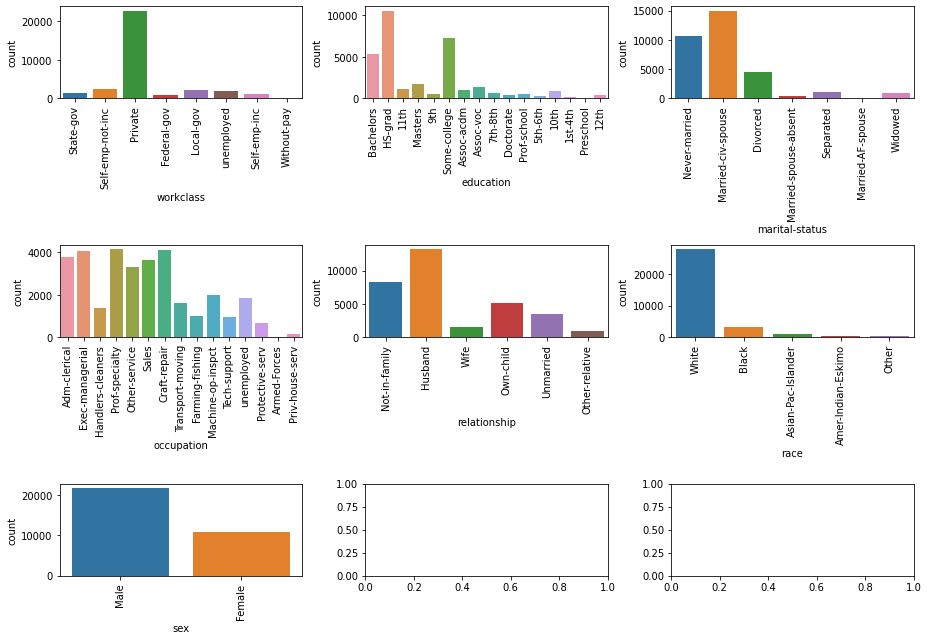

In [19]:
#Countplot to see the distribution of the categorical predictors:

categoricals = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

fig = plt.figure(figsize=(13,9))
axes = fig.subplots(nrows = 3, ncols = 3)
for ax, categorical in zip(axes.flatten(), categoricals):
    f = sns.countplot(df[categorical], ax = ax)
    f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.show()

In [20]:
#Workclass analysis:

df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unemployed           1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64

In [21]:
#Workclass aggregation:

d_w = {
    "Private" : "Private",
    "Self-emp-not-inc" : "Private",
    "Local-gov" : "Not Private",
    "State-gov" : "Not Private",
    "Self-emp-inc" : "Private",
    "Federal-gov" : "Not Private",
    "Without-pay" : "Private",
    "unemployed" : "Private"
}

df["workclass"] = df["workclass"].map(d_w)
df["workclass"].value_counts()

Private        28203
Non Private     4351
Name: workclass, dtype: int64

In [22]:
#Marital-status analysis:

df["marital-status"].value_counts()

Married-civ-spouse       14975
Never-married            10678
Divorced                  4442
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [23]:
#Marital-status aggregation:

d_m = {
    'Married-civ-spouse' : "Married",
    'Married-AF-spouse' : "Married",
    'Never-married' : "Not Married",
    'Divorced' : "Not Married",
    'Separated' : "Not Married",
    'Widowed' : "Not Married",
    'Married-spouse-absent' : "Not Married"
}

df["marital-status"] = df["marital-status"].map(d_m)
df["marital-status"].value_counts()

Not Married    17556
Married        14998
Name: marital-status, dtype: int64

In [24]:
#Race analysis:

df["race"].value_counts()

White                 27811
Black                  3122
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [25]:
#Race aggregation:

d_r = {
    'White' : "White",
    'Black' : "Not White",
    'Asian-Pac-Islander' : "Not White",
    'Amer-Indian-Eskimo' : "Not White",
    'Self-emp-inc' : "Not White",
    'Other' : "Not White",
}

df["race"] = df["race"].map(d_r)
df["race"].value_counts()

White        27811
Not White     4743
Name: race, dtype: int64

In [26]:
#Analysis of 'occupation':

df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
unemployed           1836
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [27]:
#Aggregation of 'occupation':

d_o = {
    "Machine-op-inspct" : "Tecnical_services",
    "Tech-support" : "Tecnical_services",
    "Prof-specialty" : "Prof-specialty",
    "Craft-repair" : "Other",
    "Exec-managerial" : "Exec-managerial",
    "Adm-clerical" : "Adm-clerical",
    "Sales" : "Sales",
    "Other-service" : "Other",
    "Transport-moving" : "Transport-moving",
    "Handlers-cleaners" : "Marginal_Professions",
    "Farming-fishing" : "Marginal_Professions",
    "Protective-serv" : "Marginal_Professions",
    "Priv-house-serv" : "Marginal_Professions",
    "Armed-Forces" : "Marginal_Professions",
    "unemployed" : "unemployed"
}

df["occupation"] = df["occupation"].map(d_o)
df["occupation"].value_counts()

Other                   7394
Prof-specialty          4140
Exec-managerial         4066
Adm-clerical            3770
Sales                   3650
Marginal_Professions    3171
Tecnical_services       2930
unemployed              1836
Transport-moving        1597
Name: occupation, dtype: int64

In [28]:
#Drop of 'education' because this is information is already present in 'education-num':

df.drop(columns = "education", inplace = True)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,target,capital
0,39,Non Private,13,Not Married,Adm-clerical,Not-in-family,White,Male,40,<=50K,2174
1,50,Private,13,Married,Exec-managerial,Husband,White,Male,13,<=50K,0
2,38,Private,9,Not Married,Marginal_Professions,Not-in-family,White,Male,40,<=50K,0
3,53,Private,7,Married,Marginal_Professions,Husband,Not White,Male,40,<=50K,0
4,28,Private,13,Married,Prof-specialty,Wife,Not White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married,Tecnical_services,Wife,White,Female,38,<=50K,0
32557,40,Private,9,Married,Tecnical_services,Husband,White,Male,40,>50K,0
32558,58,Private,9,Not Married,Adm-clerical,Unmarried,White,Female,40,<=50K,0
32559,22,Private,9,Not Married,Adm-clerical,Own-child,White,Male,20,<=50K,0


In [29]:
#Drop of 'relationship' because this is information is already present in 'marital-status':

df.drop(columns = "relationship", inplace = True)
df

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,target,capital
0,39,Non Private,13,Not Married,Adm-clerical,White,Male,40,<=50K,2174
1,50,Private,13,Married,Exec-managerial,White,Male,13,<=50K,0
2,38,Private,9,Not Married,Marginal_Professions,White,Male,40,<=50K,0
3,53,Private,7,Married,Marginal_Professions,Not White,Male,40,<=50K,0
4,28,Private,13,Married,Prof-specialty,Not White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married,Tecnical_services,White,Female,38,<=50K,0
32557,40,Private,9,Married,Tecnical_services,White,Male,40,>50K,0
32558,58,Private,9,Not Married,Adm-clerical,White,Female,40,<=50K,0
32559,22,Private,9,Not Married,Adm-clerical,White,Male,20,<=50K,0


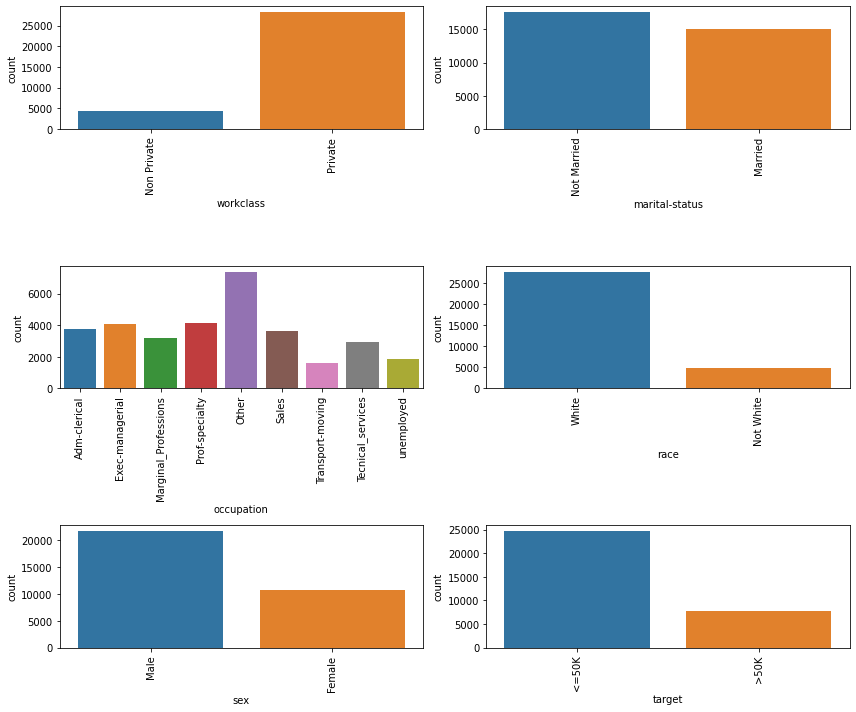

In [30]:
#Rewatch of the categorical variables after the aggregation process:

categoricals = ['workclass', 'marital-status', 'occupation', 'race', 'sex', 'target']

fig = plt.figure(figsize = (12,10))
axes = fig.subplots(nrows = 3, ncols = 2)
for ax, categorical in zip(axes.flatten(), categoricals):
    f = sns.countplot(df[categorical], ax = ax, )
    f.set_xticklabels(f.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Encoding of the categorical variables:


The Encoding had been made both through the use of the function "DataFrame.map()" for the binary variable and through the class "ColumnTransformer (OneHotEncoder)" for the multimodal variable "occupation"

In [31]:
df

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,target,capital
0,39,Non Private,13,Not Married,Adm-clerical,White,Male,40,<=50K,2174
1,50,Private,13,Married,Exec-managerial,White,Male,13,<=50K,0
2,38,Private,9,Not Married,Marginal_Professions,White,Male,40,<=50K,0
3,53,Private,7,Married,Marginal_Professions,Not White,Male,40,<=50K,0
4,28,Private,13,Married,Prof-specialty,Not White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married,Tecnical_services,White,Female,38,<=50K,0
32557,40,Private,9,Married,Tecnical_services,White,Male,40,>50K,0
32558,58,Private,9,Not Married,Adm-clerical,White,Female,40,<=50K,0
32559,22,Private,9,Not Married,Adm-clerical,White,Male,20,<=50K,0


In [32]:
#Encoding of 'workclass':

d_w = {
    "Private" : 1,
    "Not Private" : 0
}

df["workclass"] = df["workclass"].map(d_w)
df["workclass"].value_counts()

1    28203
0     4351
Name: workclass, dtype: int64

In [33]:
#Encoding of 'marital-status'

d_m = {
    "Married" : 1,
    "Not Married" : 0
}


df["marital-status"] = df["marital-status"].map(d_m)
df["marital-status"].value_counts()

0    17556
1    14998
Name: marital-status, dtype: int64

In [34]:
#Encoding of 'race':

d_r = {
    "White" : 1,
    "Not White" : 0,
}

df["race"] = df["race"].map(d_r)
df["race"].value_counts()

1    27811
0     4743
Name: race, dtype: int64

In [35]:
#Encoding of 'sex':

d_s = {
    "Male" : 0,
    "Female" : 1,
}

df["sex"] = df["sex"].map(d_s)
df["sex"].value_counts()

0    21785
1    10769
Name: sex, dtype: int64

In [36]:
#Encoding of 'target':

d_t = {
    "<=50K" : 0,
    ">50K" : 1,
}

df["target"] = df["target"].map(d_t)
df["target"].value_counts()

0    24713
1     7841
Name: target, dtype: int64

In [37]:
#Encoding of 'occupation' using a 'ColumnTransformer' object:

categories = ["occupation"]
ohe = OneHotEncoder(drop = 'first', sparse = False, dtype = int)

ct = ColumnTransformer(transformers = [("OneHot", ohe, categories)], remainder = "passthrough")
data = ct.fit_transform(df)

In [38]:
#Obtaining the correct position of the columns to restore the Dataframe:

names = []

count = 0
for name in ct.get_feature_names():
    
    if count < 8:
        names.append(name[11:].lower().replace("-", "_"))
    else:
        names.append(name.lower().replace("-", "_"))        
    count += 1
names

['exec_managerial',
 'marginal_professions',
 'other',
 'prof_specialty',
 'sales',
 'tecnical_services',
 'transport_moving',
 'unemployed',
 'age',
 'workclass',
 'education_num',
 'marital_status',
 'race',
 'sex',
 'hours_per_week',
 'target',
 'capital']

In [39]:
#New encoded Dataframe:

df = pd.DataFrame(data, columns = nomi)
df

,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,age,workclass,education_num,marital_status,race,sex,hours_per_week,target,capital
0,0,0,0,0,0,0,0,0,39,0,13,0,1,0,40,0,2174
1,1,0,0,0,0,0,0,0,50,1,13,1,1,0,13,0,0
2,0,1,0,0,0,0,0,0,38,1,9,0,1,0,40,0,0
3,0,1,0,0,0,0,0,0,53,1,7,1,0,0,40,0,0
4,0,0,0,1,0,0,0,0,28,1,13,1,0,1,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,0,0,0,0,0,1,0,0,27,1,12,1,1,1,38,0,0
32550,0,0,0,0,0,1,0,0,40,1,9,1,1,0,40,1,0
32551,0,0,0,0,0,0,0,0,58,1,9,0,1,1,40,0,0
32552,0,0,0,0,0,0,0,0,22,1,9,0,1,0,20,0,0


In [40]:
#Saving the not scaled Dataset into a csv to use it for DecisionTrees:

#df.to_csv("Dataset_Adult_Not_Scaled.csv", index = False)

### Scaling of the numerical variables:

The Scaling had been made with the class "StandardScaler" put in a "ColumnTransformer" object

In [41]:
#Scaling of numerical variables using a StandardScaler object:

numerics = ["age", "education_num", "hours_per_week", "capital"]
ss = StandardScaler()

scaling = ColumnTransformer(transformers = [("Standard", ss, numerics)], remainder = "passthrough")
scalati = scaling.fit_transform(df)

In [42]:
#Correct order of the columns for the new scaled Dataframe:

names = [ 
  'age', 
  'education_num',
  'hours_per_week',
  'capital',
  'exec_managerial',
  'marginal_professions',
  'other',
  'prof_specialty',
  'sales',
  'tecnical_services',
  'transport_moving',
  'unemployed',
  'workclass',
  'marital_status',
  'race',
  'sex',
  'target']

In [43]:
#New Dataframe ready to estimate models:

df = pd.DataFrame(scalati, columns = nomi)
df

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,0.03,1.13,-0.04,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0.84,1.13,-2.22,-0.13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
2,-0.04,-0.42,-0.04,-0.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
3,1.06,-1.20,-0.04,-0.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
4,-0.78,1.13,-0.04,-0.13,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,-0.85,0.75,-0.20,-0.13,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00
32550,0.10,-0.42,-0.04,-0.13,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00
32551,1.42,-0.42,-0.04,-0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
32552,-1.22,-0.42,-1.66,-0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


In [44]:
#Adjusting the type for the categorical variables:

for index in df.columns[4:]:
    df[index] = df[index].apply(lambda x:int(x))
df

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,0.03,1.13,-0.04,0.16,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.84,1.13,-2.22,-0.13,1,0,0,0,0,0,0,0,1,1,1,0,0
2,-0.04,-0.42,-0.04,-0.13,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1.06,-1.20,-0.04,-0.13,0,1,0,0,0,0,0,0,1,1,0,0,0
4,-0.78,1.13,-0.04,-0.13,0,0,0,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,-0.85,0.75,-0.20,-0.13,0,0,0,0,0,1,0,0,1,1,1,1,0
32550,0.10,-0.42,-0.04,-0.13,0,0,0,0,0,1,0,0,1,1,1,0,1
32551,1.42,-0.42,-0.04,-0.13,0,0,0,0,0,0,0,0,1,0,1,1,0
32552,-1.22,-0.42,-1.66,-0.13,0,0,0,0,0,0,0,0,1,0,1,0,0


In [45]:
#Saving the pre-processed Dataset into a csv:

#df.to_csv("Dataset_Adult_Not_Balance.csv", index = False)